In [9]:
# Importing the standard Python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Actor Specific Problem Formulations

In [10]:
# Loading in the necessary modules for EMA workbench and functions
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport

from problem_formulation import sum_over

In [11]:
# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

# Loading in all the 17 objectives via predefined problem formulation 3
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    dike_model = get_model_for_problem_formulation(3)

[MainProcess/INFO] model initialized


In [12]:
# Replicate the uncertainties
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [13]:
# Replicate the levers
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [14]:
# Replicate the objectives
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage')
ScalarOutcome('A.1_Dike Investment Costs')
ScalarOutcome('A.1_Expected Number of Deaths')
ScalarOutcome('A.2_Expected Annual Damage')
ScalarOutcome('A.2_Dike Investment Costs')
ScalarOutcome('A.2_Expected Number of Deaths')
ScalarOutcome('A.3_Expected Annual Damage')
ScalarOutcome('A.3_Dike Investment Costs')
ScalarOutcome('A.3_Expected Number of Deaths')
ScalarOutcome('A.4_Expected Annual Damage')
ScalarOutcome('A.4_Dike Investment Costs')
ScalarOutcome('A.4_Expected Number of Deaths')
ScalarOutcome('A.5_Expected Annual Damage')
ScalarOutcome('A.5_Dike Investment Costs')
ScalarOutcome('A.5_Expected Number of Deaths')
ScalarOutcome('RfR Total Costs')
ScalarOutcome('Expected Evacuation Costs')


In [15]:
# Import ScalarOutcome from ema_workbench to define the actor specific outcomes of interest in the next function
from ema_workbench import ScalarOutcome

In [16]:
# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor):
   
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE
    
    model.uncertainties = uncertainties
    model.levers = levers

    if problem_formulation_actor == 4: # RWS
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage',
                            variable_name=['{}_Expected Annual Damage'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction),

            ScalarOutcome('Total Investment Costs',
                            variable_name=['{}_Dike Investment Costs'.format(dike)
                                                for dike in function.dikelist] + ['RfR Total Costs'
                                                                                ] + ['Expected Evacuation Costs'],
                            function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths',
                            variable_name=['{}_Expected Number of Deaths'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction)] 
    
    elif problem_formulation_actor == 5: # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A1-4',
                            variable_name=['A.1_Expected Annual Damage' ,'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=sum_over, kind=direction),

            ScalarOutcome('Investment Costs A1-4',
                            variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths in A1-4',
                            variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=sum_over, kind=direction)]
    
    elif problem_formulation_actor == 6: # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A5', variable_name=['A.5_Expected Annual Damage'], kind=direction),

            ScalarOutcome('Investment Costs A5', variable_name=['A.5_Dike Investment Costs'], kind=direction),

            ScalarOutcome('Expected Number of Deaths in A5', variable_name=['A.5_Expected Number of Deaths'], kind=direction)]
    
    else:
        raise TypeError('unknown identifier')
    return model

In [17]:
# Loading in the right problem formulation, in this case for Gelderland
model = problem_formulation_actor(5)

[MainProcess/INFO] model initialized


In [18]:
# Check the levers
for outcome in model.levers:
    print(repr(outcome))

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [19]:
# Check the uncertainties
for outcome in model.uncertainties:
    print(repr(outcome))

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [20]:
# Check is the right objectives are loaded in
for outcome in model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage A1-4', variable_name=['A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=<function sum_over at 0x00000263E54A42F0>)
ScalarOutcome('Investment Costs A1-4', variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=<function sum_over at 0x00000263E54A42F0>)
ScalarOutcome('Expected Number of Deaths in A1-4', variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=<function sum_over at 0x00000263E54A42F0>)


# MORDM Worst Case

In [21]:
# Worst case specification
worstcase_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 1,
                        'discount rate': 1.5,
                        'ID flood wave shape': 4}


worstcase_scen = {}

for key in dike_model.uncertainties:
    name_split = key.name.split('_')
    if len(name_split) == 1:

        worstcase_scen.update({key.name: worstcase_values[key.name]})
    else:
        worstcase_scen.update({key.name: worstcase_values[name_split[1]]})
            
worst_scenario = Scenario('reference', **worstcase_scen)

In [22]:
# Loading in the right packages for running the optimization
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)

In [15]:
# Searching for candidate solutions, by variating the definitions of the levers for the worst case scenario
convergence_metrics = {EpsilonProgress()}

with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=10000, searchover='levers',
                                 convergence=convergence_metrics,
                                 epsilons=[0.05,]*len(model.outcomes), reference=worst_scenario)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 200/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 300/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies

[MainProcess/INFO] generation 29: 2792/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 94 policies * 1 model(s) = 94 experiments
[MainProcess/INFO] 31 cases completed
[MainProcess/INFO] 62 cases completed
[MainProcess/INFO] 93 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 30: 2886/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 96 policies * 1 model(s) = 96 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 31: 2982/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 92 policies * 1 model(s) = 92 experiments
[MainProcess/INFO] 31 cases completed
[MainProcess/INFO] 62 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 32: 3074/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases complete

[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 59: 5633/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 91 policies * 1 model(s) = 91 experiments
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 60: 5724/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 98 policies * 1 model(s) = 98 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 61: 5822/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 95 policies * 1 model(s) = 95 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 62: 5917/10000 nfe
[MainP

[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 88: 8412/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 89: 8509/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 90: 8606/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 98 policies * 1 model(s) = 98 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 91: 8704/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 

In [32]:
# Specifying the results for the worst case scenario
worst_results = results
worst_convergence = convergence

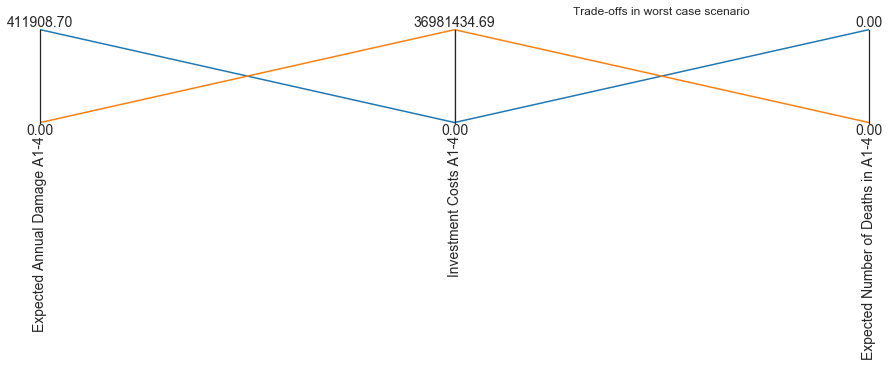

In [33]:
# Plot the trade-offs between the outcomes of interest
from ema_workbench.analysis import parcoords

worst_data = worst_results.loc[:, [o.name for o in model.outcomes]]
worst_limits = parcoords.get_limits(worst_data)
worst_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(worst_limits)
paraxes.plot(worst_data)
plt.title('Trade-offs in worst case scenario')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# When only 1 solution is proposed, this will result in a flat line

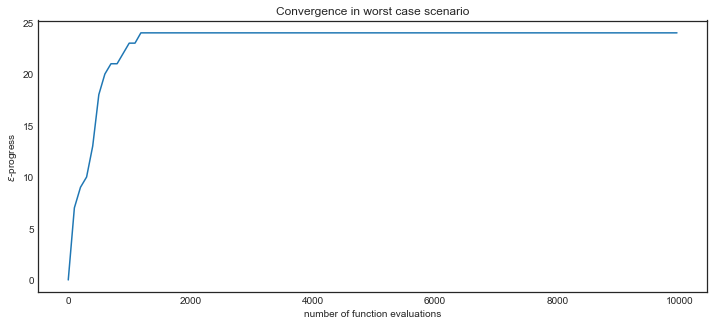

In [18]:
# By plotting whether the results are converged nicely, it can be checked whether more nfe's are necessary to run
import matplotlib.pyplot as plt
plt.plot(worst_convergence.nfe,worst_convergence.epsilon_progress)
plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.title('Convergence in worst case scenario')
plt.show()

In [19]:
# Complete results dataframe
worst_results

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat,Expected Annual Damage A1-4,Investment Costs A1-4,Expected Number of Deaths in A1-4
0,0,0,0,0,1,1,0,1,1,0,3,411908.699703,0.000000e+00,0.000044
1,0,1,0,0,2,0,1,1,1,1,3,0.000000,3.698143e+07,0.000000


In [20]:
# The outcomes of interest are dropped from the dataframe, obtaining a dataframe with only the solutions specified
worstcase_policies = worst_results
worstcase_policies = worstcase_policies.drop([o.name for o in model.outcomes], axis=1)
worstcase_policies

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat
0,0,0,0,0,1,1,0,1,1,0,3
1,0,1,0,0,2,0,1,1,1,1,3


In [21]:
# Selecting the policies that are proposed as solutions for further robustness tests
from ema_workbench import Policy

worstcase_policies_to_evaluate = []

for i, policy in worstcase_policies.iterrows():
    worstcase_policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [22]:
# Testing the robustness of the proposed solutions for 1000 random scenarios
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    worst_results = evaluator.perform_experiments(n_scenarios,
                                            worstcase_policies_to_evaluate)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 2 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1400 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [23]:
# Saving the results
from ema_workbench import save_results

save_results(worst_results, 'MORDM_reevaluation_GELDERLAND_worstcase.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\LocalAdmin\Google Drive\EPAself\Model-Based Decision-Making\epa1361_open-master\final assignment\MORDM_reevaluation_GELDERLAND_worstcase.tar.gz


In [23]:
# Loading in the results again
from ema_workbench import load_results

results_reevaluation_gelderland_worstcase = load_results('MORDM_reevaluation_GELDERLAND_worstcase.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Documents\EPA\EPA1361\UPDATE3\final assignment\MORDM_reevaluation_GELDERLAND_worstcase.tar.gz


In [24]:
# Defining a function to calculate the signal-to-noise ratio, a robustness metric
def s_to_n(worst_data, direction):
    mean = np.mean(worst_data)
    std = np.std(worst_data)
    
    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std

In [25]:
# In this piece of code, the signal-to-noise ratios are calculated, by iterating over the policies and outcomes
# Finally, the results are stored in a dataframe
experiments, outcomes = results_reevaluation_gelderland_worstcase

overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    
    logical = experiments['policy']==policy
    
    for outcome in model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

,Expected Annual Damage A1-4,Expected Number of Deaths in A1-4,Investment Costs A1-4
0,9.541031e+16,0.001741,0.000000
1,9.279051e+16,0.001624,0.275533


C:\Users\Anne Boijmans\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Anne Boijmans\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


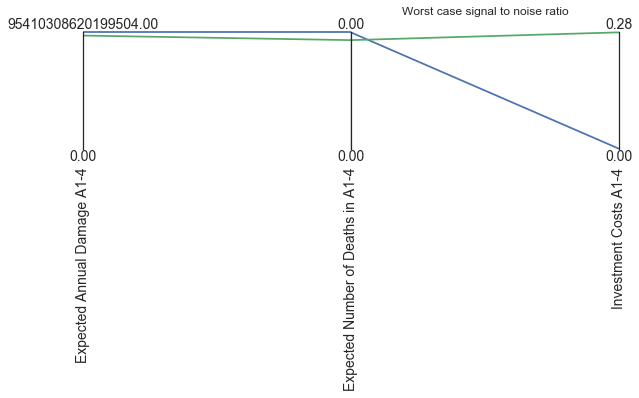

In [26]:
# The signal-to-noise metrics are also plotted to show the trade-offs between the outcomes of interest
from ema_workbench.analysis import parcoords

worstcase_data = scores
worstcase_limits = parcoords.get_limits(worstcase_data)
worstcase_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(worstcase_limits)
paraxes.plot(worstcase_data)
plt.title('Worst case signal to noise ratio')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


plt.show()

In [27]:
# With 'regret' the outcomes of interest for the various scenarios are compared
# to the scenario that provides the most preferred outcomes
experiments, outcomes = results_reevaluation_gelderland_worstcase

worstcase_regret = {}
worstcase_max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario_id":experiments['scenario_id']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario_id', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
   
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value

    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()
   
    worstcase_regret[outcome.name] = worstcase_regret
    worstcase_max_regret[outcome.name] = outcome_regret.max()

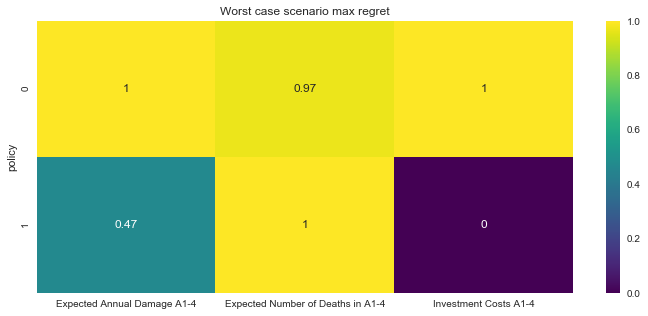

In [28]:
# The regret for each outcome of interest is shown for each solution, scored from 0-1. This is plotted, using a heatmap
worstcase_max_regret = pd.DataFrame(worstcase_max_regret)
sns.heatmap(worstcase_max_regret/worstcase_max_regret.max(), cmap='viridis', annot=True)
plt.title('Worst case scenario max regret')
plt.show()

# When only one solution comes forward, this part of code generates an error, since no comparison can be made

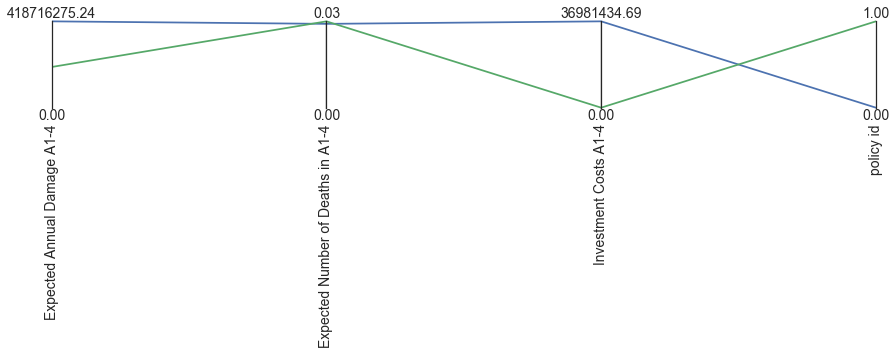

In [30]:
# In order to identify which policy belongs to which regret-trade-off line, the policy ID's are added to the parcoords plot
worst_data = worstcase_max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
worst_data['policy id'] = worst_data.index.astype("float64")

worst_limits = parcoords.get_limits(worst_data)
worst_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(worst_limits)
paraxes.plot(worst_data)


plt.show()